# Course: Introduction to Data Visualization with Python
- [DataCamp.com course link](https://campus.datacamp.com/courses/introduction-to-data-visualization-with-python/)
- [Slides](data_viz_python-ch1_slides.pdf)

# matplotlib.pyplot

## Key matplotlib.pyplot plot functions:
```
plt.plot(x, y, ...)
plt.show()
```

Positioning and axes:
- `.axes([xlo, ylo, width, height])` -- *Manually* define a new set of axes and make "active" for subsequent plt commands.
- `.subplot(nrows, ncols, nsubplot)` -- Automatically defines grid with multiple axes for subsequent plt commands.  Indexing of nsubplot starts at top left and goes in reading order, starting from 1.
- `.axis(xmin, xmax, ymin, ymax)` -- Set axis "extents"/scale to zoom in or out.
  - `.xlim()`, `ylim()` can also be used to set axes ranges.
  - `.axis(option)` -- Various options like: 'on', 'off', 'equal', 'tight', ...

Other:
- `.legend(loc='lower center')`
- `.annotate(s='Label', xy=(x_point, x_point), ...)`
- `.savefig(filename)` -- Export plot to image.

Style sheets:
- `.style.use(stylename)` -- Examples: `'ggplot', 'fivethirtyeight', 'seaborn-*'`
- `.style.available` -- List alls the styles

## Working w/ 2D arrays & bivariate functions

NumPy functions:
- `np.linspace(start, stop, num=50)` - Creates 1D ndarray of uniformly-spaced numbers over a specified interval.
- `X, Y = np.meshgrid(u, v)` -- Replicates 1D arrays u, v along different axes to make 2D arrays X, Y.  "Return coordinate matrices from coordinate vectors." [NumPy docs](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.meshgrid.html?highlight=meshgrid#numpy.meshgrid).

Image-like plot types:
- `plt.pcolor(Z)` - "Pseudocolor" plot.
    - `plt.pcolor(X, Y, Z)` - Display X, Y values instead of matrix index values.
    - `plt.colorbar()` -- Display color bar duh.
    - `plt.axis('tight')` -- Trims whitespace around pcolor() plot.
- `plt.contour(Z, ncontours)` -- Contour plot.
- `plt.contourf(Z, ncontours)` -- *Filled* contour plot.
- Options:
  - `cmap='autumn'`

<div class="alert alert-block alert-info">
Note: Pyplot images are oriented differently from 2D arrays -- they go from *left -> right* then **bottom -> top**.
</div>


## Visualizing bivariate distributions
- Bins in 1D: histograms are typically used.
- Bins in **2D**: Rectangles & hexagons are commonly used.
- `.hist2d(x, y)` -- Rectangular binning plot
  - Options:
    - `bins=(nx, ny)`
    - `range=((xmin, xmax), (ymin, ymax))` -- Specifies rectangular region/range included in plot.
- `.hexbin(x, y)` -- Hexagonal binning plot
  - Options:
    - `gridsize=(nx, ny)`
    - `extent=(xmin, xmax, ymin, ymax)` -- Specifies rectangular region/range included.
    
## Working with images
- Color raster images are usually stored as *three* 2D arrays, one channel for each RGB value.
- B&W raster images are are *two* 2D arrays.
- `.imread(filename)` -- Read in 2D raster image.
- `.imshow(filename)` -- Display raster image.
  - `plt.axis('off')` typically used.
- `.imshow(Z)` -- Display matrix s a 2D raster image.
  - Options:
    - `aspect=2.0` -- Ratio of displayed width to height.
    - `extent=(0, 640, 0, 480)` -- Range used to label x- and y-axes.

Converting color to  grayscale:
- `collapsed = img.mean(axis=2)`
- `plt.set_cmap('gray')`

# Seaborn

[Lauren's Seaborn Tutorial Notebook](https://github.com/giggles-data-science/Python-3-DS/blob/master/Data_Visualzation_with_Seaborn_Python3.ipynb)

## Visualizing regressions with  (bivariate)

Regressions are useful to understand relationships between *two continuous variables*.
**Seaborn** is built on top of `matplotlib` as a more elegant plotting interface.

Example:
```
import matplotlib.pyplot as plt
import seaborn as sns

tips = sns.load_dataset('tips')
sns.lmplot(x='total_bill', y='tip', data=tips)

plt.show()
```

*Note*: Categorical types are sometimes called "factors"

**Linear regression plots:**
- `sns.lmplot(x='x_col', y='y_col', data=df)`
- It's a higher-level interface to `sns.regplot()`
- `plt.scatter()`
- Options:
  - `hue='gender'` -- Automatically colors this factor/categorical
  - `palette='Set1'` -- Color palette to use
  - `col='gender'` -- Separates factors/categoricals into subplots (without "subplot()" needed)
  - `order=n` -- Order of polynomial regression


**Residual plots:**
- "Residuals" are how much the data misses the regression line
- `sns.residplot(x='x_col', y='y_col', data=df)`
- A bit more flexible than `lmplot()`: x and y can be NumPy arrays or strings, data is DataFrame (optional)
- Options:
  - `color='red'` -- Consistent w/ matplotlib

## Visualizing univariate distributions with Seaborn

Purpose is to explore how the distribution of a *single continuous variable* is affected by a *second categorical variable*.

Techniques:
- **Strip plots**
  - `sns.stripplot(x='day', y='tip', data=tips)`
  - Options:
    - `size=nsize`
    - `jitter=True`
- **Swarm plots** -- Automatically distribute overlapping values
  - `sns.swarmplot(x='day', y='tip', data=tips)`
  - Options:
    - `hue='gender'` -- Group by another categorical column
    - `orient='h'` -- Horizontal orientation
- **Violin & box + whisker plots** -- Useful for lots of data vs. strip and swarm plots which visualize *all* the datapoints.
  - `sns.boxplot(x='day', y='tip', data=tips)`
  - `sns.violinplot(x='day', y='tip', data=tips)`
- You can also combine some of these plot types -- just make another `*plot()` call before calling `show()`

## Visualizing multivariate distributions

- **Joint plots**
  - `sns.jointplot()`
  - "kind" param options:
    - `kind='scatter`' uses a scatter plot of the data points
    - `kind='reg'` uses a regression plot (default order 1)
    - `kind='resid` uses a residual plot
    - `kind='kde'` uses a kernel density estimate of the joint distribution to smooth distributions visually
    - `kind='hex'` uses a hexbin plot of the joint distribution
  - Includes univariate histograms along each axis.
- **Pair plots**
  - `sns.pairplot(df)`
  - Displays grid of all variables against each other.  Diagonal axis is a histogram.
  - Ignores non-numeric columns.
  - Use `hue='category'` to group
- **Heat maps**
  - `sns.heatmap(covariance_df)`
  - To get covariance matrix: `covariance_df = df.cov()`
  
- **Bar plots**
  - In seaborn, helpful error bars show by default
 

# Time series

Time  series index data type is `pandas.tseries.index.DatetimeIndex`.
Handy plotting options for time series:
- `plt.xticks(dates,  labels,  rotation=60)` to format x-axis tick mark labels and orientation.

# Histogram equalization in images

## Rescaling intensities/increasing contrast:
```
orig_img = plt.imread('grayscale_image.jpg')      # Flattens 2D array to 1D array
rescaled = (255/(orig_img.max - orig_img.min)) * (orig_img.flatten = orig.min)
plt.imshow(rescaled)
plt.show()
```

## Sharpening images using the CDF (cumulative distribution function):
- `hist()` param `cumulative=True` -- Permits viewing the CDF instead of the PDF
- `plt.twinx()` -- Overlay a second axis along the x-axis (used here to overlay the intensities histogram (PDF) and the CDF.)

Full example:

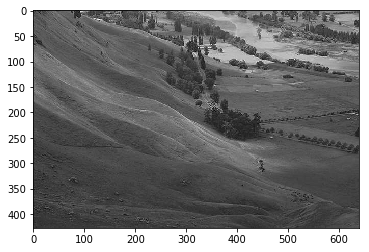

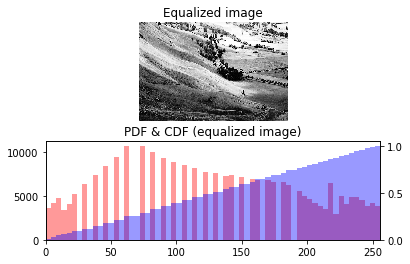

In [49]:
import matplotlib.pyplot as plt
import numpy as np

# Load the image into an array: image
image = plt.imread('640_Unequalized_Hawkes_Bay_NZ.jpg')

plt.imshow(image, cmap='gray')
plt.show()

# Flatten the image into 1 dimension: pixels
pixels = image.flatten()

# Generate a cumulative histogram
cdf, bins, patches = plt.hist(pixels, bins=256, range=(0,256), normed=True, cumulative=True)
new_pixels = np.interp(pixels, bins[:-1], cdf*255)

# Reshape new_pixels as a 2-D array: new_image
new_image = np.reshape(new_pixels, image.shape)

# Display the new image with 'gray' color map
plt.subplot(2,1,1)
plt.title('Equalized image')
plt.axis('off')
plt.imshow(new_image, cmap='gray')

# Generate a histogram of the new pixels
plt.subplot(2,1,2)
pdf = plt.hist(new_pixels, bins=64, range=(0,256), normed=False,
               color='red', alpha=0.4)
plt.grid('off')

# Use plt.twinx() to overlay the CDF in the bottom subplot
plt.twinx()
plt.xlim((0,256))
plt.grid('off')

# Add title
plt.title('PDF & CDF (equalized image)')

# Generate a cumulative histogram of the new pixels
cdf = plt.hist(new_pixels, bins=64, range=(0,256),
               cumulative=True, normed=True,
               color='blue', alpha=0.4)
plt.show()


## Extracting histograms from a color image

Full code example:

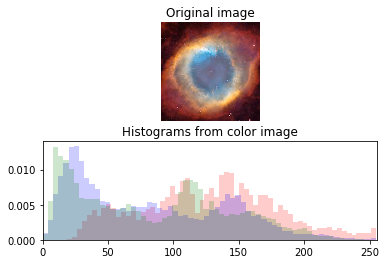

In [50]:
# Load the image into an array: image
image = plt.imread('hs-2004-32-b-small_web.jpg')

# Display image in top subplot
plt.subplot(2,1,1)
plt.title('Original image')
plt.axis('off')
plt.imshow(image)

# Extract 2-D arrays of the RGB channels: red, blue, green
red, green, blue = image[:,:,0], image[:,:,1], image[:,:,2]

# Flatten the 2-D arrays of the RGB channels into 1-D
red_pixels = red.flatten()
blue_pixels = blue.flatten()
green_pixels = green.flatten()

# Overlay histograms of the pixels of each color in the bottom subplot
plt.subplot(2,1,2)
plt.title('Histograms from color image')
plt.xlim((0,256))
plt.hist(red_pixels, bins=64, normed=True, color='red', alpha=0.2)
plt.hist(blue_pixels, bins=64, normed=True, color='blue', alpha=0.2)
plt.hist(green_pixels, bins=64, normed=True, color='green', alpha=0.2)

# Display the plot
plt.show()


## Extracting bivariate histograms from a color image

Full code example:

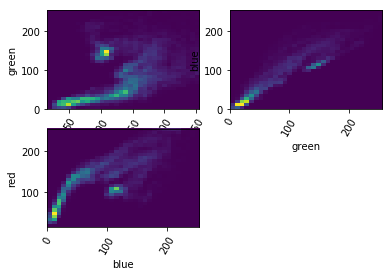

In [51]:
# Load the image into an array: image
image = plt.imread('hs-2004-32-b-small_web.jpg')

# Extract RGB channels and flatten into 1-D array
red, blue, green = image[:,:,0], image[:,:,1], image[:,:,2]
red_pixels = red.flatten()
blue_pixels = blue.flatten()
green_pixels = green.flatten()

# Generate a 2-D histogram of the red and green pixels
plt.subplot(2,2,1)
plt.grid('off') 
plt.xticks(rotation=60)
plt.xlabel('red')
plt.ylabel('green')
plt.hist2d(x=red_pixels, y=green_pixels, bins=(32, 32))

# Generate a 2-D histogram of the green and blue pixels
plt.subplot(2,2,2)
plt.grid('off')
plt.xticks(rotation=60)
plt.xlabel('green')
plt.ylabel('blue')
plt.hist2d(x=green_pixels, y=blue_pixels, bins=(32, 32))

# Generate a 2-D histogram of the blue and red pixels
plt.subplot(2,2,3)
plt.grid('off')
plt.xticks(rotation=60)
plt.xlabel('blue')
plt.ylabel('red')
plt.hist2d(x=blue_pixels, y=red_pixels, bins=(32, 32))

# Display the plot
plt.show()


***
# Course: Interactive Data Visualization with Bokeh
- [Datacamp.com course link](https://www.datacamp.com/courses/interactive-data-visualization-with-bokeh)

From [Bokeh site](https://bokeh.pydata.org/en/latest/): "Bokeh is an *interactive visualization library that targets modern web browsers for presentation*. Its goal is to provide elegant, concise construction of versatile graphics, and to extend this capability with *high-performance interactivity over very large or streaming datasets*. Bokeh can help anyone who would like to quickly and easily create interactive plots, dashboards, and data applications."

Dude pronouces it "Boh-kay".

## Glyphs, Patches
- [Ch. 1 Slides](data_viz_bokeh-ch1_slides.pdf)

Glyph data & properties can be given as:
- lists, 
- sequences, 
- Numpy ndarrays arrays, 
- pandas Series (which are also ndarrays), 
- **column data source** data structure: Common fundamental data structure used internally by Bokeh.  Like a stripped-down DataFrame.
    - data transfer object passed to front-end JS & HTML!
    - `.data` attribute is Python dict

Properties are customizable by "policies", which are specified as *prefixes* in property names e.g. `hover_color=` or `nonselection_fill_alpha=`

In [52]:
# Key Bokeh imports
from bokeh.plotting import figure
from bokeh.io import output_file, show

# Sample data
from bokeh.sampledata.iris import flowers as df

# Customization: hover
from bokeh.models import HoverTool

# Customization: color mapping
from bokeh.models import CategoricalColorMapper

In [53]:
# Manually create a CDS
from bokeh.models import ColumnDataSource

source = ColumnDataSource(data={
    'x': [1,2,3,4,5],
    'y': [8,6,5,2,3]})

print(source.data)

# Create from DataFrame
source_df = ColumnDataSource(df)

{'x': [1, 2, 3, 4, 5], 'y': [8, 6, 5, 2, 3]}


Example from :

In [54]:
from bokeh.plotting import figure, output_notebook, show

# prepare some data
x = [1, 2, 3, 4, 5]
y = [6, 7, 2, 4, 5]

# output to static HTML file
output_notebook()

# create a new plot with a title and axis labels
p = figure(title="simple line example", x_axis_label='x', y_axis_label='y')

# add a line renderer with legend and line thickness
p.line(x, y, legend="Temp.", line_width=2)

# show the results
show(p)

Loading BokehJS ...

## Layouts

- [Ch. 2 Slides](data_viz_bokeh-ch2_slides.pdf)

Layout types:
- rows & columns
- grids
- tabs in panels
- (nesting of the above)

## Linking plots

axes: Just assign `.xrange` or `.y_range` properties of figures to each other. E.g.:
- `p3.x_range = p2.x_range = p1.x_range`

selections: assign the `source=` property of figures to the same value.

## Bokeh Server

- [Ch. 4 Slides](data_viz_bokeh-ch4_slides.pdf) (Yes, there's no chapter 3.)

The main purpose of the *Bokeh server* is to synchronize python objects (and all their properties) with web applications in a browser, so that rich, interactive data applications can be connected to powerful PyData libraries such as NumPy, SciPy, Pandas, and scikit-learn.

[Anaconda Cloud](https://anaconda.org/) offers Bokeh application hosting.

### Basic app outline

In [55]:
from bokeh.plotting import figure
from bokeh.layouts import row
from bokeh.io import curdoc

# Create plots and widgets

# Add callbacks

# Arrange plots and widgets in layouts 

# Add to root of doc
curdoc().add_root(layout)

Then run the server on the command-line:
```
$ bokeh serve --show example_bokeh_app.py
```

### Example: slider.py
Run with `$ bokeh serve --show slider.py`

In [56]:
with open('slider.py') as file:
    print(file.read())

from bokeh.io import curdoc
from bokeh.layouts import column
from bokeh.models import ColumnDataSource, Slider
from bokeh.plotting import figure
from numpy.random import random

N = 300
source = ColumnDataSource(data={'x': random(N), 'y': random(N)})

# Create plots and widgets
plot = figure()
plot.circle(x= 'x', y='y', source=source)
slider = Slider(start=100, end=1000, value=N,
                step=10, title='Number of points')

# Add callback to widgets
def callback(attr, old, new):
    N = slider.value
    source.data={'x': random(N), 'y': random(N)}
slider.on_change('value', callback)

# Arrange plots and widgets in layouts
layout = column(slider, plot)

curdoc().add_root(layout)



## Bokeh App Case Study

[Ch. 5 Slides](data_viz_bokeh-ch5_slides.pdf)